In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/03.%20Week%203/Infrared/Infrared.csv"
df = pd.read_csv(url)
print(df.head())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
2     0.8625    35.6525    35.5175      34.2775  ...  34.8275  34.6475   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4225  34.6550   
4     0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   

   T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0  33.4925  33.0025    34.5300     

In [22]:
df = df.dropna()

In [23]:
target = 'aveOralM'
X = df.drop(columns=[target])
y = df[target]

In [24]:
categorical_features = ['Gender', 'Age', 'Ethnicity']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

X_train = pd.concat([X_train_scaled, X_train.drop(columns=numerical_features)], axis=1)
X_test = pd.concat([X_test_scaled, X_test.drop(columns=numerical_features)], axis=1)


In [25]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [26]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [27]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-Squared: {r2:.4f}\n")

In [28]:
evaluate_model(y_test, y_pred_knn, "K-NN")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

K-NN Performance:
MSE: 0.0674
RMSE: 0.2596
R-Squared: 0.6613

Decision Tree Performance:
MSE: 0.1252
RMSE: 0.3539
R-Squared: 0.3704



# **1. Mean Squared Error (MSE)**
MSE mengukur rata-rata kuadrat dari selisih antara nilai aktual dan nilai prediksi.

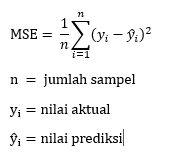

MSE menunjukkan seberapa besar kesalahan yang dibuat oleh model secara rata-rata. Nilai yang lebih kecil menunjukkan model yang lebih akurat.

# **2. Root Mean Squared Error (RMSE)**
RMSE adalah akar dari MSE, digunakan untuk mendapatkan nilai dalam satuan yang sama dengan target variabel.

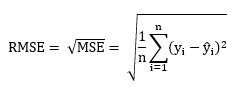

RMSE lebih mudah diinterpretasikan dibandingkan MSE karena nilainya dalam satuan yang sama dengan target variabel.

# **3. R-Squared**
R-Squared mengukur seberapa baik model dapat menjelaskan variasi dalam data.

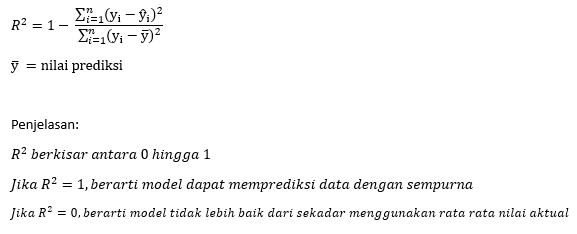

